In [ ]:
# Реализуйте кастомные слои:
# - Кастомный сверточный слой с дополнительной логикой
# - Attention механизм для CNN
# - Кастомная функция активации
# - Кастомный pooling слой
# 
# Для каждого слоя:
# - Реализуйте forward и backward проходы
# - Добавьте параметры если необходимо
# - Протестируйте на простых примерах
# - Сравните с стандартными аналогами

Базовая модель параметров: 161482
Улучшенная модель параметров: 161807
Обучение базовой модели


100%|██████████| 79/79 [00:02<00:00, 33.72it/s]


Epoch 1/10:
Train Loss: 1.1844, Train Acc: 0.5743
Test Loss: 1.0731, Test Acc: 0.6284
--------------------------------------------------


100%|██████████| 79/79 [00:02<00:00, 34.79it/s]


Epoch 2/10:
Train Loss: 0.7907, Train Acc: 0.7222
Test Loss: 0.8963, Test Acc: 0.6921
--------------------------------------------------


100%|██████████| 79/79 [00:02<00:00, 33.75it/s]


Epoch 3/10:
Train Loss: 0.6671, Train Acc: 0.7652
Test Loss: 0.7416, Test Acc: 0.7446
--------------------------------------------------


100%|██████████| 79/79 [00:02<00:00, 33.74it/s]


Epoch 4/10:
Train Loss: 0.5798, Train Acc: 0.7988
Test Loss: 0.6793, Test Acc: 0.7617
--------------------------------------------------


100%|██████████| 79/79 [00:02<00:00, 34.21it/s]


Epoch 5/10:
Train Loss: 0.5208, Train Acc: 0.8192
Test Loss: 0.6690, Test Acc: 0.7774
--------------------------------------------------


100%|██████████| 79/79 [00:02<00:00, 34.55it/s]


Epoch 6/10:
Train Loss: 0.4584, Train Acc: 0.8410
Test Loss: 0.5725, Test Acc: 0.8060
--------------------------------------------------


100%|██████████| 79/79 [00:02<00:00, 34.23it/s]


Epoch 7/10:
Train Loss: 0.4146, Train Acc: 0.8556
Test Loss: 0.6020, Test Acc: 0.7934
--------------------------------------------------


100%|██████████| 79/79 [00:02<00:00, 34.21it/s]


Epoch 8/10:
Train Loss: 0.3771, Train Acc: 0.8680
Test Loss: 0.6168, Test Acc: 0.7964
--------------------------------------------------


100%|██████████| 79/79 [00:02<00:00, 32.60it/s]


Epoch 9/10:
Train Loss: 0.3342, Train Acc: 0.8847
Test Loss: 0.6258, Test Acc: 0.7960
--------------------------------------------------


100%|██████████| 79/79 [00:02<00:00, 35.67it/s]


Epoch 10/10:
Train Loss: 0.3016, Train Acc: 0.8966
Test Loss: 0.6909, Test Acc: 0.7872
--------------------------------------------------
Обучение базовой модели заняло: 334.40 секунд
Обучение улучшенной модели


100%|██████████| 79/79 [00:03<00:00, 25.07it/s]


Epoch 1/10:
Train Loss: 1.2215, Train Acc: 0.5587
Test Loss: 0.9409, Test Acc: 0.6691
--------------------------------------------------


100%|██████████| 79/79 [00:03<00:00, 25.30it/s]


Epoch 2/10:
Train Loss: 0.7926, Train Acc: 0.7232
Test Loss: 0.9652, Test Acc: 0.6778
--------------------------------------------------


100%|██████████| 79/79 [00:03<00:00, 25.48it/s]


Epoch 3/10:
Train Loss: 0.6469, Train Acc: 0.7746
Test Loss: 0.6653, Test Acc: 0.7682
--------------------------------------------------


100%|██████████| 79/79 [00:03<00:00, 25.50it/s]


Epoch 4/10:
Train Loss: 0.5621, Train Acc: 0.8063
Test Loss: 0.6347, Test Acc: 0.7796
--------------------------------------------------


100%|██████████| 79/79 [00:03<00:00, 25.69it/s]


Epoch 5/10:
Train Loss: 0.4873, Train Acc: 0.8323
Test Loss: 0.5915, Test Acc: 0.7926
--------------------------------------------------


100%|██████████| 79/79 [00:03<00:00, 25.68it/s]


Epoch 6/10:
Train Loss: 0.4310, Train Acc: 0.8510
Test Loss: 0.6171, Test Acc: 0.7925
--------------------------------------------------


100%|██████████| 79/79 [00:03<00:00, 25.72it/s]


Epoch 7/10:
Train Loss: 0.3849, Train Acc: 0.8676
Test Loss: 0.6546, Test Acc: 0.7812
--------------------------------------------------


100%|██████████| 79/79 [00:03<00:00, 25.69it/s]


Epoch 8/10:
Train Loss: 0.3452, Train Acc: 0.8810
Test Loss: 0.7413, Test Acc: 0.7728
--------------------------------------------------


100%|██████████| 79/79 [00:03<00:00, 25.63it/s]


Epoch 9/10:
Train Loss: 0.3076, Train Acc: 0.8931
Test Loss: 0.6332, Test Acc: 0.7892
--------------------------------------------------


100%|██████████| 79/79 [00:03<00:00, 25.69it/s]


Epoch 10/10:
Train Loss: 0.2701, Train Acc: 0.9066
Test Loss: 0.6003, Test Acc: 0.8089
--------------------------------------------------
Обучение улучшенной модели заняло: 478.42 секунд


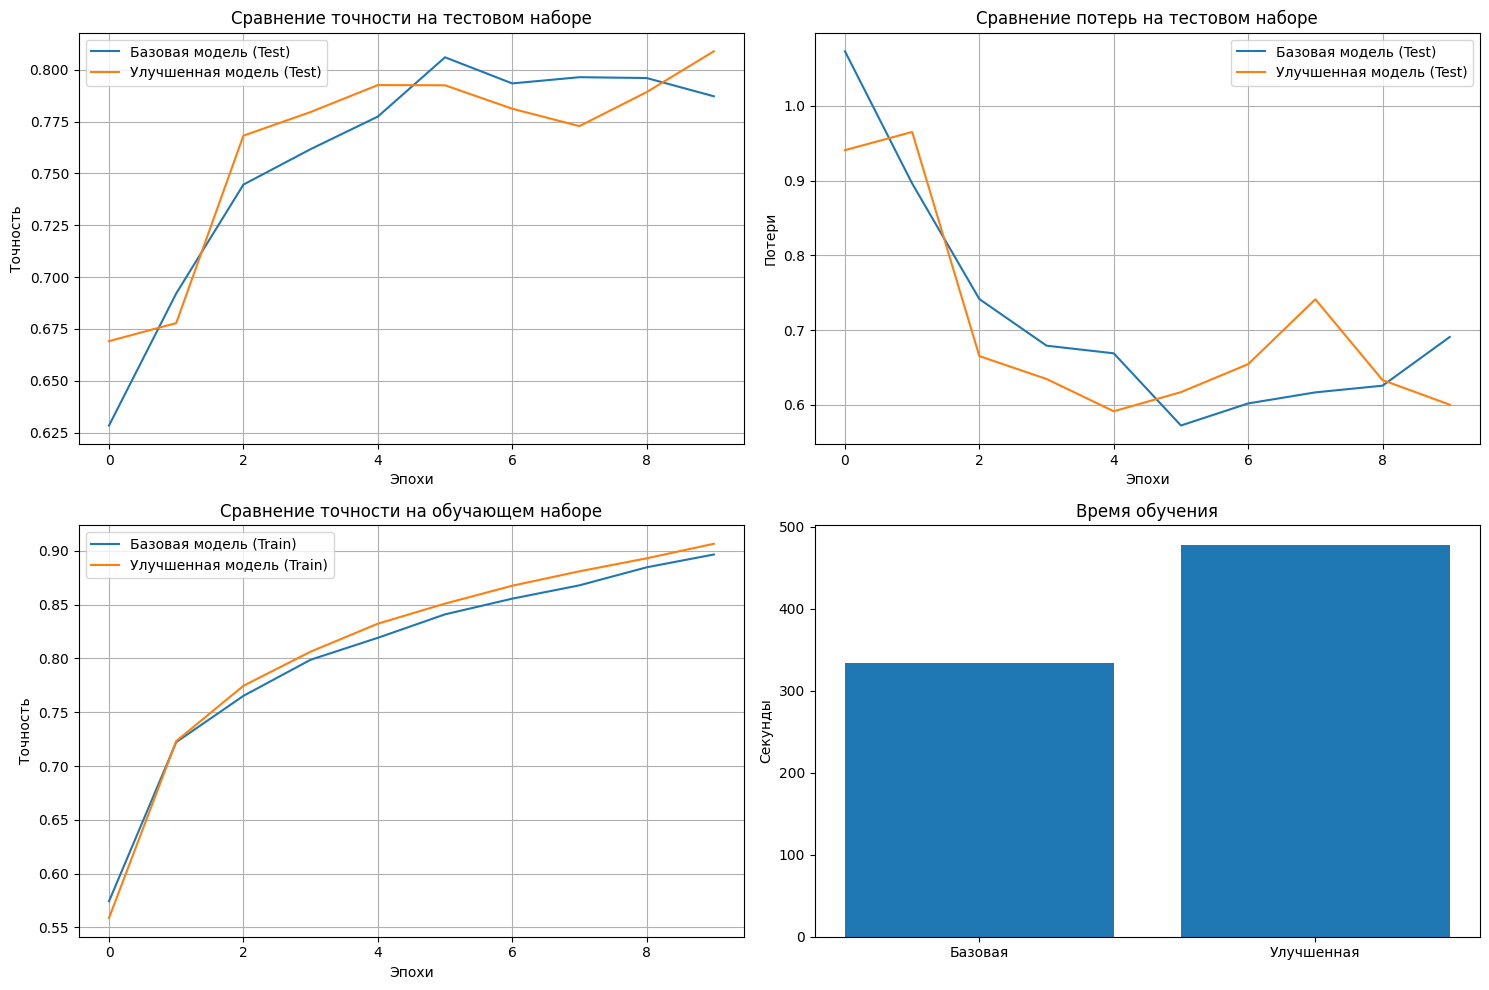

Итоговые результаты
Базовая модель - Лучшая точность на тесте: 0.8060
Улучшенная модель - Лучшая точность на тесте: 0.8089
Разница в точности: 0.0029
Увеличение времени обучения: 144.01 секунд (1.43x)


In [ ]:
from datasets import get_cifar_loaders
from trainer import train_model
from utils import plot_training_history, count_parameters
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Function
import json
from models import ResidualBlock,CNNWithResidual
import time
import torch.optim as optim


# Кастомный сверточный слой с дополнительной логикой

class CustomConv2d(nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size, stride=1, padding=0, scale=1.0):
        super().__init__()
        self.conv = nn.Conv2d(
            in_channels, 
            out_channels, 
            kernel_size, 
            stride=stride, 
            padding=padding,
            bias=False 
        )
        self.bn = nn.BatchNorm2d(out_channels)
        self.scale = nn.Parameter(torch.tensor(scale, dtype=torch.float32))
        self.bias = nn.Parameter(torch.zeros(1, out_channels, 1, 1))

    def forward(self, x):
        out = self.conv(x)
        out = self.bn(out)
        out = out * self.scale + self.bias
        return out


# Attention-механизм для CNN
class ChannelAttention(nn.Module):
    def __init__(self, in_planes, reduction=16):
        super().__init__()
        self.avg_pool = nn.AdaptiveAvgPool2d(1)
        self.max_pool = nn.AdaptiveMaxPool2d(1)
        self.fc = nn.Sequential(
            nn.Linear(in_planes, in_planes // reduction),
            nn.ReLU(inplace=True),
            nn.Linear(in_planes // reduction, in_planes)
        )
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        b, c, _, _ = x.size()
        avg_out = self.fc(self.avg_pool(x).view(b, c))
        max_out = self.fc(self.max_pool(x).view(b, c))
        out = avg_out + max_out
        return self.sigmoid(out).view(b, c, 1, 1)

class SpatialAttention(nn.Module):
    def __init__(self, kernel_size=7):
        super().__init__()
        self.conv = nn.Conv2d(2, 1, kernel_size, padding=kernel_size//2, bias=False)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        avg_out = torch.mean(x, dim=1, keepdim=True)
        max_out, _ = torch.max(x, dim=1, keepdim=True)
        concat = torch.cat([avg_out, max_out], dim=1)
        return self.sigmoid(self.conv(concat))

class CBAM(nn.Module):
    def __init__(self, in_planes):
        super().__init__()
        self.ca = ChannelAttention(in_planes)
        self.sa = SpatialAttention()

    def forward(self, x):
        x = x * self.ca(x)
        x = x * self.sa(x)
        return x


# 3. Кастомная функция активации
class SwishFunction(Function):
    @staticmethod
    def forward(ctx, x):
        ctx.save_for_backward(x)
        return x * torch.sigmoid(x)

    @staticmethod
    def backward(ctx, grad_output):
        x = ctx.saved_tensors[0]
        sig = torch.sigmoid(x)
        return grad_output * (sig + x * sig * (1 - sig))

class Swish(nn.Module):
    def forward(self, x):
        return SwishFunction.apply(x)

# 4. Кастомный pooling слой
class LpPooling(nn.Module):
    def __init__(self, p=2, kernel_size=2, stride=2):
        super().__init__()
        self.p = p
        self.kernel_size = kernel_size
        self.stride = stride

    def forward(self, x):
        x_abs = torch.abs(x)
        x_powered = torch.pow(x_abs, self.p)
        pooled = F.avg_pool2d(x_powered, self.kernel_size, self.stride)
        return torch.pow(pooled, 1/self.p)

# Улучшенная модель с кастомными слоями
class EnhancedResidualCNN(nn.Module):
    def __init__(self, input_channels=3, num_classes=10):
        super().__init__()
        self.conv1 = CustomConv2d(input_channels, 32, 3, 1, 1)
        self.bn1 = nn.BatchNorm2d(32)
        self.attn1 = CBAM(32)
        self.swish = Swish()

        self.res1 = ResidualBlock(32, 32)
        self.res2 = ResidualBlock(32, 64, 2)
        self.res3 = ResidualBlock(64, 64)
        
        self.pool = LpPooling(p=2, kernel_size=4, stride=4)
        self.fc = nn.Linear(64 * 4 * 4, num_classes)
    
    def forward(self, x):
        x = self.swish(self.bn1(self.conv1(x)))
        x = self.attn1(x)
        x = self.res1(x)
        x = self.res2(x)
        x = self.res3(x)
        x = self.pool(x)
        x = x.view(x.size(0), -1)
        x = self.fc(x)
        return x


# Тестирование
if __name__ == '__main__':
    device = torch.device('mps' if torch.mps.is_available() else 'cpu')

    # Загрузка данных CIFAR-10
    train_loader, test_loader = get_cifar_loaders(batch_size=128)

    base_model = CNNWithResidual(input_channels=3, num_classes=10).to(device)
    enhanced_model = EnhancedResidualCNN(input_channels=3, num_classes=10).to(device)
    
    print(f"Базовая модель параметров: {count_parameters(base_model)}")
    print(f"Улучшенная модель параметров: {count_parameters(enhanced_model)}")

    # Гиперпараметры обучения
    epochs = 10
    lr = 0.001

    # Обучение базовой модели
    print("Обучение базовой модели")
    start_time = time.time()
    base_history = train_model(base_model, train_loader, test_loader, 
                              epochs=epochs, lr=lr, device=device)
    base_train_time = time.time() - start_time
    print(f"Обучение базовой модели заняло: {base_train_time:.2f} секунд")

    # Обучение улучшенной модели
    print("Обучение улучшенной модели")
    start_time = time.time()
    enhanced_history = train_model(enhanced_model, train_loader, test_loader, 
                                  epochs=epochs, lr=lr, device=device)
    enhanced_train_time = time.time() - start_time
    print(f"Обучение улучшенной модели заняло: {enhanced_train_time:.2f} секунд")

    # Визуализация результатов
    plt.figure(figsize=(15, 10))
    
    # Сравнение точности
    plt.subplot(2, 2, 1)
    plt.plot(base_history['test_accs'], label='Базовая модель (Test)')
    plt.plot(enhanced_history['test_accs'], label='Улучшенная модель (Test)')
    plt.title('Сравнение точности на тестовом наборе')
    plt.xlabel('Эпохи')
    plt.ylabel('Точность')
    plt.legend()
    plt.grid(True)

    # Сравнение потерь
    plt.subplot(2, 2, 2)
    plt.plot(base_history['test_losses'], label='Базовая модель (Test)')
    plt.plot(enhanced_history['test_losses'], label='Улучшенная модель (Test)')
    plt.title('Сравнение потерь на тестовом наборе')
    plt.xlabel('Эпохи')
    plt.ylabel('Потери')
    plt.legend()
    plt.grid(True)

    # Сравнение точности на обучающем наборе
    plt.subplot(2, 2, 3)
    plt.plot(base_history['train_accs'], label='Базовая модель (Train)')
    plt.plot(enhanced_history['train_accs'], label='Улучшенная модель (Train)')
    plt.title('Сравнение точности на обучающем наборе')
    plt.xlabel('Эпохи')
    plt.ylabel('Точность')
    plt.legend()
    plt.grid(True)

    # Сравнение времени обучения
    plt.subplot(2, 2, 4)
    plt.bar(['Базовая', 'Улучшенная'], [base_train_time, enhanced_train_time])
    plt.title('Время обучения')
    plt.ylabel('Секунды')
    
    plt.tight_layout()
    plt.savefig('comparison_results.png')
    plt.show()

    # Анализ результатов
    print("Итоговые результаты")
    print(f"Базовая модель - Лучшая точность на тесте: {max(base_history['test_accs']):.4f}")
    print(f"Улучшенная модель - Лучшая точность на тесте: {max(enhanced_history['test_accs']):.4f}")
    print(f"Разница в точности: {max(enhanced_history['test_accs']) - max(base_history['test_accs']):.4f}")
    print(f"Увеличение времени обучения: {enhanced_train_time - base_train_time:.2f} секунд ({enhanced_train_time/base_train_time:.2f}x)")

In [ ]:
# Исследуйте различные варианты Residual блоков:
# - Базовый Residual блок
# - Bottleneck Residual блок
# - Wide Residual блок
# 
# Для каждого варианта:
# - Реализуйте блок с нуля
# - Сравните производительность
# - Проанализируйте количество параметров
# - Исследуйте стабильность обучения


Создание модели: Basic Residual
Количество параметров: 175258
Обучение модели: Basic Residual


100%|██████████| 79/79 [00:01<00:00, 41.89it/s]


Epoch 1/10:
Train Loss: 1.5204, Train Acc: 0.4247
Test Loss: 1.6965, Test Acc: 0.4128
--------------------------------------------------


100%|██████████| 79/79 [00:01<00:00, 41.81it/s]


Epoch 2/10:
Train Loss: 1.0637, Train Acc: 0.6158
Test Loss: 1.1401, Test Acc: 0.6005
--------------------------------------------------


100%|██████████| 79/79 [00:01<00:00, 41.64it/s]


Epoch 3/10:
Train Loss: 0.8835, Train Acc: 0.6845
Test Loss: 0.9793, Test Acc: 0.6602
--------------------------------------------------


100%|██████████| 79/79 [00:01<00:00, 41.78it/s]


Epoch 4/10:
Train Loss: 0.7663, Train Acc: 0.7290
Test Loss: 0.8866, Test Acc: 0.6838
--------------------------------------------------


100%|██████████| 79/79 [00:01<00:00, 42.17it/s]


Epoch 5/10:
Train Loss: 0.6814, Train Acc: 0.7597
Test Loss: 0.7818, Test Acc: 0.7276
--------------------------------------------------


100%|██████████| 79/79 [00:01<00:00, 41.89it/s]


Epoch 6/10:
Train Loss: 0.6055, Train Acc: 0.7873
Test Loss: 0.8394, Test Acc: 0.7080
--------------------------------------------------


100%|██████████| 79/79 [00:01<00:00, 41.86it/s]


Epoch 7/10:
Train Loss: 0.5483, Train Acc: 0.8063
Test Loss: 0.7064, Test Acc: 0.7558
--------------------------------------------------


100%|██████████| 79/79 [00:01<00:00, 41.88it/s]


Epoch 8/10:
Train Loss: 0.4998, Train Acc: 0.8256
Test Loss: 0.7705, Test Acc: 0.7425
--------------------------------------------------


100%|██████████| 79/79 [00:01<00:00, 41.83it/s]


Epoch 9/10:
Train Loss: 0.4520, Train Acc: 0.8417
Test Loss: 0.7536, Test Acc: 0.7542
--------------------------------------------------


100%|██████████| 79/79 [00:01<00:00, 41.78it/s]


Epoch 10/10:
Train Loss: 0.4137, Train Acc: 0.8538
Test Loss: 0.6688, Test Acc: 0.7706
--------------------------------------------------


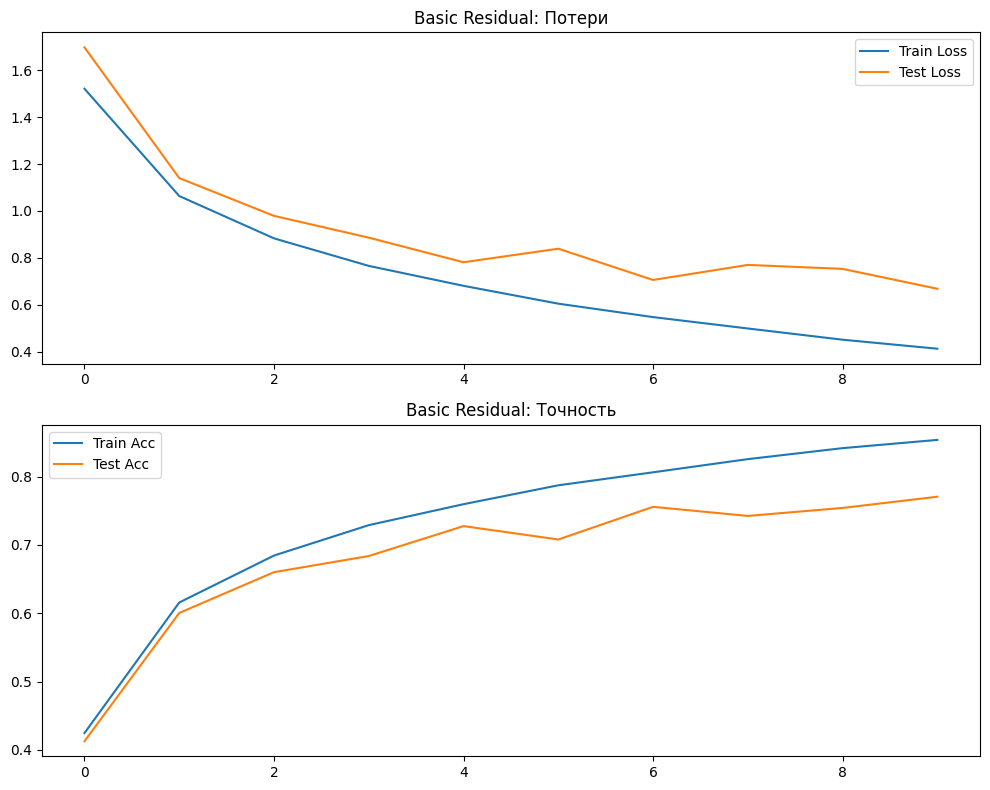


Создание модели: Bottleneck Residual
Количество параметров: 220378
Обучение модели: Bottleneck Residual


100%|██████████| 79/79 [00:04<00:00, 19.43it/s]


Epoch 1/10:
Train Loss: 1.4862, Train Acc: 0.4427
Test Loss: 1.2679, Test Acc: 0.5342
--------------------------------------------------


100%|██████████| 79/79 [00:03<00:00, 20.32it/s]


Epoch 2/10:
Train Loss: 1.0649, Train Acc: 0.6151
Test Loss: 0.9833, Test Acc: 0.6439
--------------------------------------------------


100%|██████████| 79/79 [00:03<00:00, 20.37it/s]


Epoch 3/10:
Train Loss: 0.8910, Train Acc: 0.6813
Test Loss: 0.9239, Test Acc: 0.6721
--------------------------------------------------


100%|██████████| 79/79 [00:03<00:00, 20.73it/s]


Epoch 4/10:
Train Loss: 0.7839, Train Acc: 0.7189
Test Loss: 0.8977, Test Acc: 0.6864
--------------------------------------------------


100%|██████████| 79/79 [00:03<00:00, 20.72it/s]


Epoch 5/10:
Train Loss: 0.7026, Train Acc: 0.7493
Test Loss: 0.9131, Test Acc: 0.6793
--------------------------------------------------


100%|██████████| 79/79 [00:04<00:00, 19.35it/s]


Epoch 6/10:
Train Loss: 0.6292, Train Acc: 0.7774
Test Loss: 0.8115, Test Acc: 0.7182
--------------------------------------------------


100%|██████████| 79/79 [00:03<00:00, 20.74it/s]


Epoch 7/10:
Train Loss: 0.5552, Train Acc: 0.8045
Test Loss: 0.8343, Test Acc: 0.7101
--------------------------------------------------


100%|██████████| 79/79 [00:03<00:00, 20.21it/s]


Epoch 8/10:
Train Loss: 0.5022, Train Acc: 0.8224
Test Loss: 0.7975, Test Acc: 0.7302
--------------------------------------------------


100%|██████████| 79/79 [00:03<00:00, 20.48it/s]


Epoch 9/10:
Train Loss: 0.4429, Train Acc: 0.8440
Test Loss: 0.9107, Test Acc: 0.7117
--------------------------------------------------


100%|██████████| 79/79 [00:03<00:00, 20.39it/s]


Epoch 10/10:
Train Loss: 0.3951, Train Acc: 0.8607
Test Loss: 0.8799, Test Acc: 0.7217
--------------------------------------------------


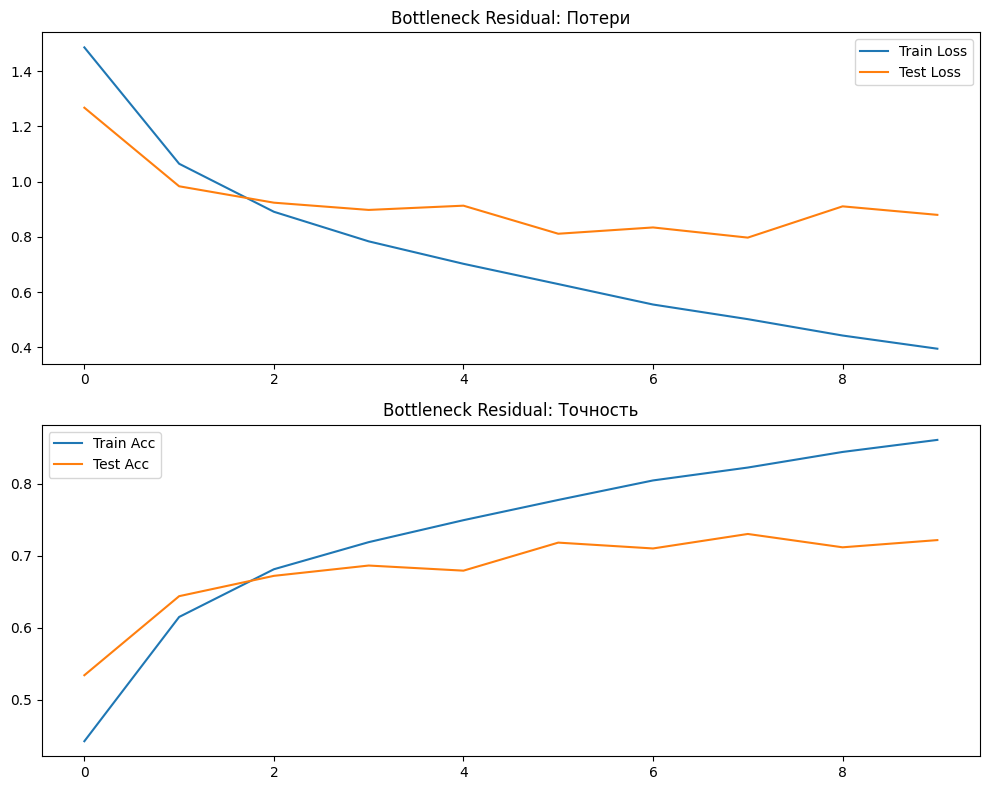


Создание модели: Wide Residual
Количество параметров: 696618
Обучение модели: Wide Residual


100%|██████████| 79/79 [00:03<00:00, 24.08it/s]


Epoch 1/10:
Train Loss: 1.6869, Train Acc: 0.3670
Test Loss: 1.3772, Test Acc: 0.4986
--------------------------------------------------


100%|██████████| 79/79 [00:03<00:00, 23.69it/s]


Epoch 2/10:
Train Loss: 1.2942, Train Acc: 0.5256
Test Loss: 1.1198, Test Acc: 0.5892
--------------------------------------------------


100%|██████████| 79/79 [00:03<00:00, 22.98it/s]


Epoch 3/10:
Train Loss: 1.1081, Train Acc: 0.5997
Test Loss: 0.9561, Test Acc: 0.6510
--------------------------------------------------


100%|██████████| 79/79 [00:03<00:00, 23.70it/s]


Epoch 4/10:
Train Loss: 0.9892, Train Acc: 0.6435
Test Loss: 0.8605, Test Acc: 0.6882
--------------------------------------------------


100%|██████████| 79/79 [00:03<00:00, 23.68it/s]


Epoch 5/10:
Train Loss: 0.9058, Train Acc: 0.6754
Test Loss: 0.8110, Test Acc: 0.7094
--------------------------------------------------


100%|██████████| 79/79 [00:03<00:00, 24.09it/s]


Epoch 6/10:
Train Loss: 0.8375, Train Acc: 0.7010
Test Loss: 0.7537, Test Acc: 0.7323
--------------------------------------------------


100%|██████████| 79/79 [00:03<00:00, 24.30it/s]


Epoch 7/10:
Train Loss: 0.7755, Train Acc: 0.7250
Test Loss: 0.6937, Test Acc: 0.7529
--------------------------------------------------


100%|██████████| 79/79 [00:03<00:00, 22.88it/s]


Epoch 8/10:
Train Loss: 0.7238, Train Acc: 0.7459
Test Loss: 0.6551, Test Acc: 0.7726
--------------------------------------------------


100%|██████████| 79/79 [00:03<00:00, 23.26it/s]


Epoch 9/10:
Train Loss: 0.6747, Train Acc: 0.7626
Test Loss: 0.6257, Test Acc: 0.7822
--------------------------------------------------


100%|██████████| 79/79 [00:03<00:00, 23.53it/s]


Epoch 10/10:
Train Loss: 0.6287, Train Acc: 0.7801
Test Loss: 0.5905, Test Acc: 0.7958
--------------------------------------------------


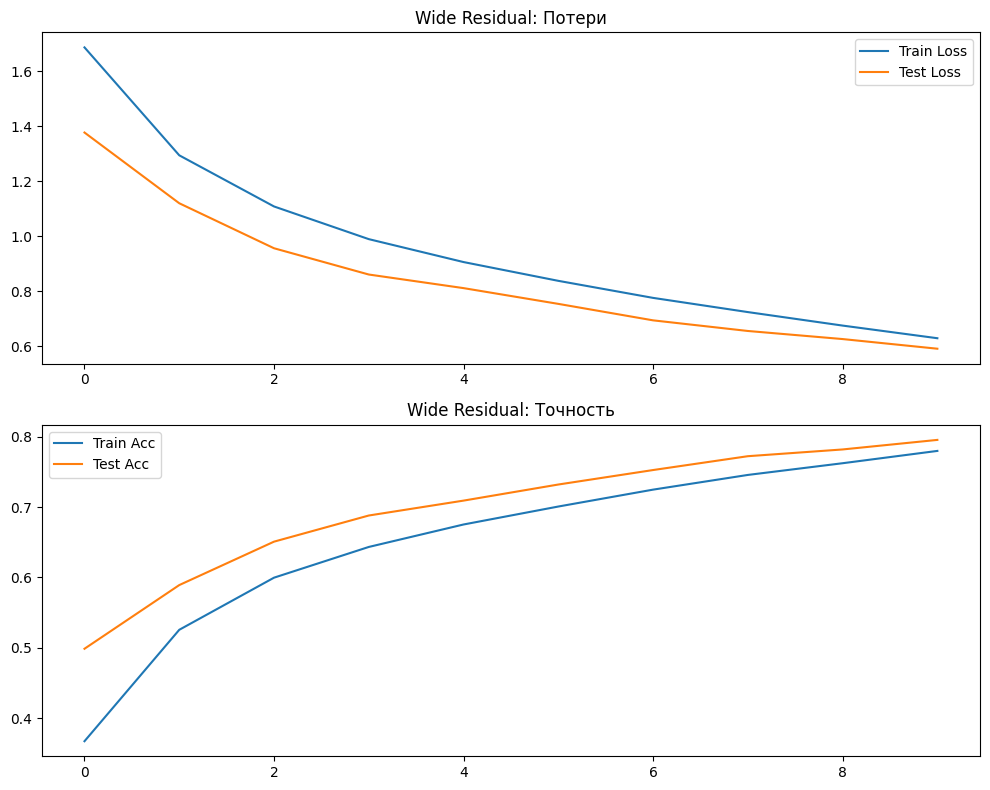

Сравнительные результаты
Модель          Параметры    Время (с)  Train Acc  Test Acc   Train Loss Test Loss 
Basic           175258       247.49     0.8538     0.7706     0.4137     0.6688    
Bottleneck      220378       600.51     0.8607     0.7302     0.3951     0.8799    
Wide            696618       591.65     0.7801     0.7958     0.6287     0.5905    


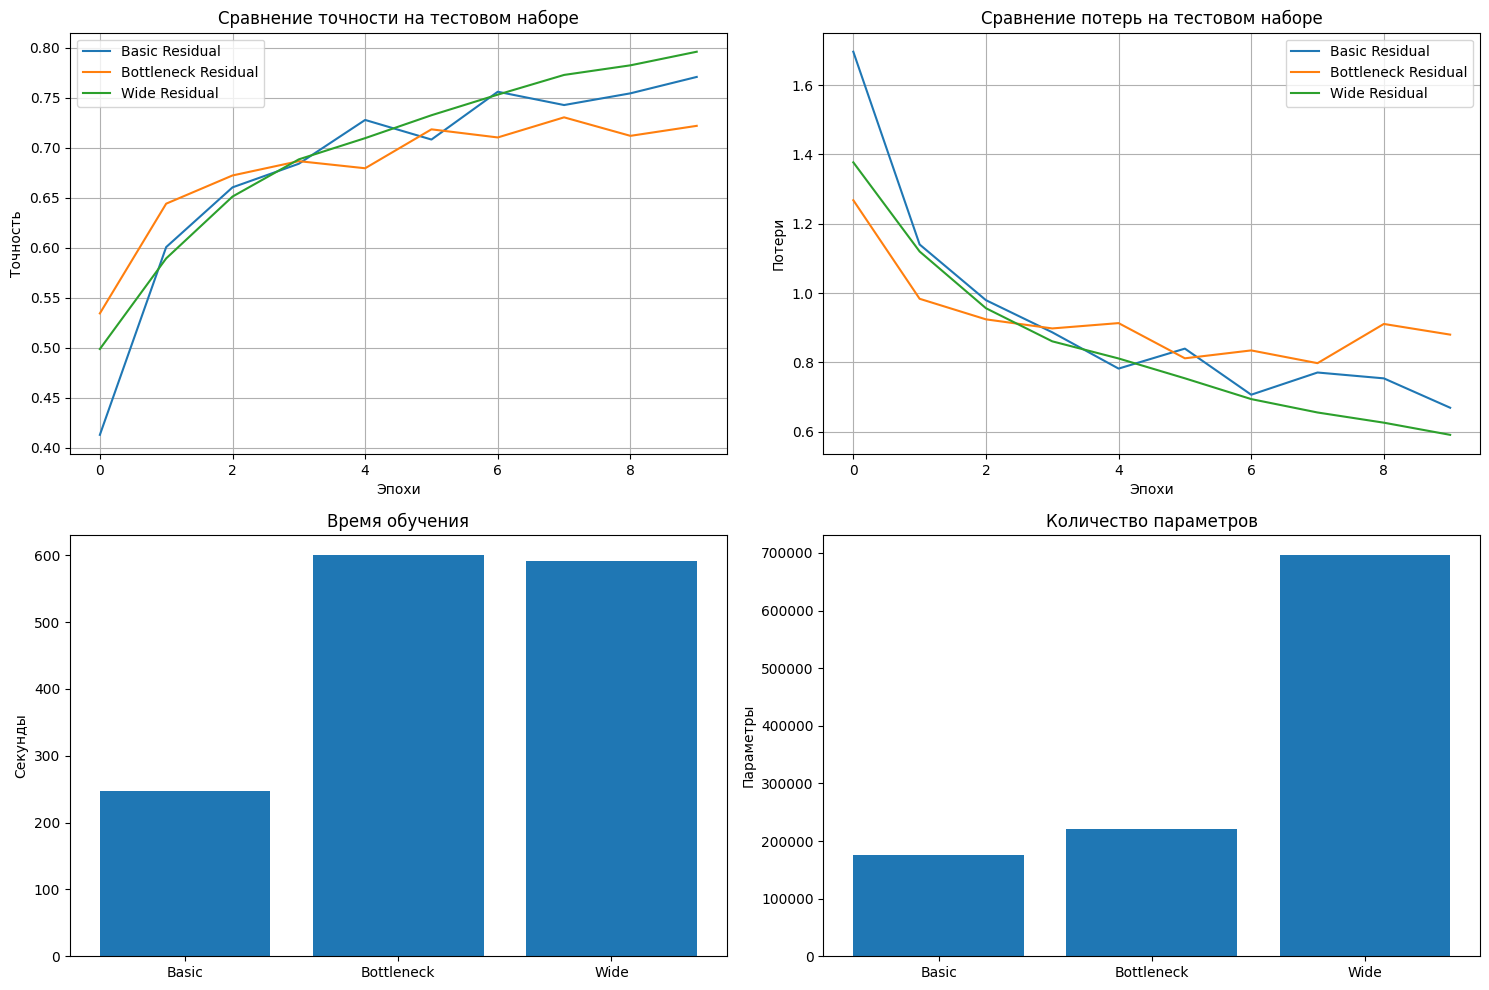

Анализ стабильности обучения
Basic Residual:
  Изменение потерь на обучении: 1.1067
  Изменение потерь на тесте:    1.0277
  Изменение точности на обучении: 0.4290
  Колебания потерь на тесте (последние 5 эпох): 0.170650
Bottleneck Residual:
  Изменение потерь на обучении: 1.0911
  Изменение потерь на тесте:    0.4704
  Изменение точности на обучении: 0.4181
  Колебания потерь на тесте (последние 5 эпох): 0.113205
Wide Residual:
  Изменение потерь на обучении: 1.0582
  Изменение потерь на тесте:    0.7866
  Изменение точности на обучении: 0.4131
  Колебания потерь на тесте (последние 5 эпох): 0.163158


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import time
from datasets import get_cifar_loaders
from trainer import train_model
from utils import plot_training_history, count_parameters
import matplotlib.pyplot as plt
import torch.nn.init as init



# Базовый Residual блок 
class BasicBlock(nn.Module):
    def __init__(self, in_channels, out_channels, stride=1):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels, out_channels, 3, stride, 1, bias=False)
        self.bn1 = nn.BatchNorm2d(out_channels)
        self.conv2 = nn.Conv2d(out_channels, out_channels, 3, 1, 1, bias=False)
        self.bn2 = nn.BatchNorm2d(out_channels)
        
        self.shortcut = nn.Sequential()
        if stride != 1 or in_channels != out_channels:
            self.shortcut = nn.Sequential(
                nn.Conv2d(in_channels, out_channels, 1, stride, bias=False),
                nn.BatchNorm2d(out_channels)
            )

    def forward(self, x):
        out = F.relu(self.bn1(self.conv1(x)))
        out = self.bn2(self.conv2(out))
        out += self.shortcut(x)
        out = F.relu(out)
        return out

# Bottleneck Residual блок
class BottleneckBlock(nn.Module):
    def __init__(self, in_channels, out_channels, stride=1, expansion=4):
        super().__init__()
        self.expansion = expansion
        mid_channels = out_channels // expansion
        
        self.conv1 = nn.Conv2d(in_channels, mid_channels, 1, 1, 0, bias=False)
        self.bn1 = nn.BatchNorm2d(mid_channels)
        self.conv2 = nn.Conv2d(mid_channels, mid_channels, 3, stride, 1, bias=False)
        self.bn2 = nn.BatchNorm2d(mid_channels)
        self.conv3 = nn.Conv2d(mid_channels, out_channels, 1, 1, 0, bias=False)
        self.bn3 = nn.BatchNorm2d(out_channels)
        self.shortcut = nn.Sequential()
        if stride != 1 or in_channels != out_channels:
            self.shortcut = nn.Sequential(
                nn.Conv2d(in_channels, out_channels, 1, stride, bias=False),
                nn.BatchNorm2d(out_channels)
            )

    def forward(self, x):
        identity = x
        
        out = F.relu(self.bn1(self.conv1(x)))
        out = F.relu(self.bn2(self.conv2(out)))
        out = self.bn3(self.conv3(out))
        
        out += self.shortcut(identity)
        out = F.relu(out)
        return out

# Wide Residual блок
class WideBlock(nn.Module):
    def __init__(self, in_channels, out_channels, stride=1, dropout_rate=0.3):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels, out_channels, 3, stride, 1, bias=False)
        self.bn1 = nn.BatchNorm2d(out_channels)
        
        self.conv2 = nn.Conv2d(out_channels, out_channels, 3, 1, 1, bias=False)
        self.bn2 = nn.BatchNorm2d(out_channels)
        
        self.dropout = nn.Dropout2d(p=dropout_rate)
        
        self.shortcut = nn.Sequential()
        if stride != 1 or in_channels != out_channels:
            self.shortcut = nn.Sequential(
                nn.Conv2d(in_channels, out_channels, 1, stride, bias=False),
                nn.BatchNorm2d(out_channels)
            )

    def forward(self, x):
        out = F.relu(self.bn1(self.conv1(x)))
        out = self.dropout(out)
        out = self.bn2(self.conv2(out))
        out += self.shortcut(x)
        out = F.relu(out)
        return out


# Общая архитектура 
class ResNetComparer(nn.Module):
    def __init__(self, block_type, num_blocks, in_channels=3, num_classes=10, 
                 base_channels=16, expansion=1, dropout_rate=0.3):
        super().__init__()
        self.block_type = block_type
        self.expansion = expansion if block_type == 'bottleneck' else 1
        self.conv1 = nn.Conv2d(in_channels, base_channels, 3, 1, 1, bias=False)
        self.bn1 = nn.BatchNorm2d(base_channels)
        self.current_channels = base_channels
        self.layer1 = self._make_layer(block_type, base_channels, num_blocks[0], stride=1, 
                                      dropout_rate=dropout_rate)
        self.layer2 = self._make_layer(block_type, base_channels*2, num_blocks[1], stride=2, 
                                      dropout_rate=dropout_rate)
        self.layer3 = self._make_layer(block_type, base_channels*4, num_blocks[2], stride=2, 
                                      dropout_rate=dropout_rate)
        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
        self.fc = nn.Linear(self.current_channels, num_classes)
        self._initialize_weights()
    
    def _make_layer(self, block_type, out_channels, num_blocks, stride, dropout_rate):
        strides = [stride] + [1] * (num_blocks - 1)
        layers = []
        
        for stride in strides:
            if block_type == 'basic':
                layers.append(BasicBlock(self.current_channels, out_channels, stride))
                self.current_channels = out_channels
            elif block_type == 'bottleneck':
                layers.append(BottleneckBlock(self.current_channels, out_channels * self.expansion, stride, self.expansion))
                self.current_channels = out_channels * self.expansion
            elif block_type == 'wide':
                layers.append(WideBlock(self.current_channels, out_channels, stride, dropout_rate))
                self.current_channels = out_channels
        
        return nn.Sequential(*layers)
    
    def _initialize_weights(self):
        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                nn.init.kaiming_normal_(m.weight, mode='fan_out', nonlinearity='relu')
            elif isinstance(m, nn.BatchNorm2d):
                nn.init.constant_(m.weight, 1)
                nn.init.constant_(m.bias, 0)
            elif isinstance(m, nn.Linear):
                nn.init.normal_(m.weight, 0, 0.01)
                nn.init.constant_(m.bias, 0)
    
    def forward(self, x):
        x = F.relu(self.bn1(self.conv1(x)))
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.avgpool(x)
        x = x.view(x.size(0), -1)
        x = self.fc(x)
        return x


# Сравнение различных Residual блоков
def compare_residual_blocks():
    device = torch.device('mps' if torch.backends.mps.is_available() else 'cpu')
    
    # Загрузка данных CIFAR-10
    train_loader, test_loader = get_cifar_loaders(batch_size=128)
    
    # Конфигурации моделей
    models_config = {
        'Basic': {
            'block_type': 'basic',
            'num_blocks': [2, 2, 2],
            'base_channels': 16,
            'expansion': 1
        },
        'Bottleneck': {
            'block_type': 'bottleneck',
            'num_blocks': [2, 2, 2],
            'base_channels': 16,
            'expansion': 4
        },
        'Wide': {
            'block_type': 'wide',
            'num_blocks': [2, 2, 2],
            'base_channels': 32,
            'dropout_rate': 0.3,
            'expansion': 1
        }
    }
    
    results = {}
    histories = {}
    
    # Обучение и оценка моделей
    for name, config in models_config.items():
        print(f"\n{'='*50}")
        print(f"Создание модели: {name} Residual")
        model = ResNetComparer(**config).to(device)
        params = count_parameters(model)
        print(f"Количество параметров: {params}")
        
        print(f"Обучение модели: {name} Residual")
        start_time = time.time()
        history = train_model(model, train_loader, test_loader, 
                             epochs=10, lr=0.001, device=device)
        train_time = time.time() - start_time

        results[name] = {
            'params': params,
            'train_time': train_time,
            'best_test_acc': max(history['test_accs']),
            'best_train_acc': max(history['train_accs']),
            'last_test_loss': history['test_losses'][-1],
            'last_train_loss': history['train_losses'][-1]
        }
        histories[name] = history
        
        # Визуализация истории обучения
        plt.figure(figsize=(10, 8))
        plt.subplot(2, 1, 1)
        plt.plot(history['train_losses'], label='Train Loss')
        plt.plot(history['test_losses'], label='Test Loss')
        plt.title(f'{name} Residual: Потери')
        plt.legend()
        
        plt.subplot(2, 1, 2)
        plt.plot(history['train_accs'], label='Train Acc')
        plt.plot(history['test_accs'], label='Test Acc')
        plt.title(f'{name} Residual: Точность')
        plt.legend()
        
        plt.tight_layout()
        plt.savefig(f'{name}_residual_history.png')
        plt.show()
    
    # Сравнение
    print("Сравнительные результаты")
    print(f"{'Модель':<15} {'Параметры':<12} {'Время (с)':<10} {'Train Acc':<10} {'Test Acc':<10} {'Train Loss':<10} {'Test Loss':<10}")
    
    for name, res in results.items():
        print(f"{name:<15} {res['params']:<12} {res['train_time']:<10.2f} "
              f"{res['best_train_acc']:<10.4f} {res['best_test_acc']:<10.4f} "
              f"{res['last_train_loss']:<10.4f} {res['last_test_loss']:<10.4f}")
    
    # Визуализация сравнения
    plt.figure(figsize=(15, 10))
    
    # Сравнение точности на тесте
    plt.subplot(2, 2, 1)
    for name, history in histories.items():
        plt.plot(history['test_accs'], label=f'{name} Residual')
    plt.title('Сравнение точности на тестовом наборе')
    plt.xlabel('Эпохи')
    plt.ylabel('Точность')
    plt.legend()
    plt.grid(True)
    
    # Сравнение потерь на тесте
    plt.subplot(2, 2, 2)
    for name, history in histories.items():
        plt.plot(history['test_losses'], label=f'{name} Residual')
    plt.title('Сравнение потерь на тестовом наборе')
    plt.xlabel('Эпохи')
    plt.ylabel('Потери')
    plt.legend()
    plt.grid(True)
    
    # Сравнение времени обучения
    plt.subplot(2, 2, 3)
    times = [res['train_time'] for res in results.values()]
    names = list(results.keys())
    plt.bar(names, times)
    plt.title('Время обучения')
    plt.ylabel('Секунды')
    
    # Сравнение количества параметров
    plt.subplot(2, 2, 4)
    params = [res['params'] for res in results.values()]
    plt.bar(names, params)
    plt.title('Количество параметров')
    plt.ylabel('Параметры')
    
    plt.tight_layout()
    plt.savefig('residual_blocks_comparison.png')
    plt.show()
    
    # Анализ стабильности обучения
    print("Анализ стабильности обучения")
    
    for name, history in histories.items():
        train_loss_diff = max(history['train_losses']) - min(history['train_losses'])
        test_loss_diff = max(history['test_losses']) - min(history['test_losses'])
        train_acc_diff = max(history['train_accs']) - min(history['train_accs'])
        
        print(f"{name} Residual:")
        print(f"  Изменение потерь на обучении: {train_loss_diff:.4f}")
        print(f"  Изменение потерь на тесте:    {test_loss_diff:.4f}")
        print(f"  Изменение точности на обучении: {train_acc_diff:.4f}")
        
        last_5_loss = history['test_losses'][-5:]
        loss_variance = max(last_5_loss) - min(last_5_loss)
        print(f"  Колебания потерь на тесте (последние 5 эпох): {loss_variance:.6f}")

if __name__ == '__main__':
    compare_residual_blocks()